# WeatherPy
----

### Analysis
* When looking at the temperature relationship to latitude, the temperature seems to be increasing in the southeren hemisphere and the northeren hemisphere is having  low temperature. Also there is a high density of cities in the range of 60 - 90F.
* Looking at Latitude vs. Humidity, both sourthern and northern hemisphere seems to have high humdity. But by looking by the scatter plot its not definite. 
* The plot graph between Latitude vs Cloudiness, its pretty consistent when compared between southern and northern hemisphere.
* Majority of the cities have a wind speed of 0 to 15mph and there is no strong correlation between the northern and sourthern hemisphere.
---


In [1]:
# Dependencies and Setup
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:

today = str(date.today())
#print(today) 

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
#print(cities)
#print(cities[0])

639


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#loop through all rows and fill in values for blank columns in dataframe
setlimit = 1
city_data = []
print("Beginning Data Retrieval\n-----------------------------")

counter = 1
for idx,val in enumerate(cities):
    target_url = "http://api.openweathermap.org/data/2.5/weather?"
    # Create settings dictionary with information we're interested in
    settings = {"units": "imperial", "appid": api_key}
    # Get current weather
    try:
        # Wrapper makesx it easier to parse 
        current_weather_city = owm.get_current(val, **settings)

        print(f"Processing Record {counter} of set {setlimit} | {val}")
        counter += 1
        # Get wetaher data for the city
        summary = ["name", "clouds.all", "sys.country","dt","main.humidity",
                   "coord.lat","coord.lon","main.temp_max","wind.speed"]
        data = current_weather_city(*summary)
        city_data.append(data)
        #print(city_data)


        if counter == 51 :
            counter = 1
            setlimit += 1

    except Exception as e:
        print(f"City: {val} not found. Skipping...")
        pass

print("-----------------------------\nData Retrieval Complete\n-----------------------------")    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | sao filipe
Processing Record 2 of set 1 | cape town
Processing Record 3 of set 1 | lompoc
Processing Record 4 of set 1 | laguna
Processing Record 5 of set 1 | punta arenas
Processing Record 6 of set 1 | katsuura
Processing Record 7 of set 1 | richards bay
Processing Record 8 of set 1 | guerrero negro
Processing Record 9 of set 1 | pochutla
Processing Record 10 of set 1 | alcaniz
Processing Record 11 of set 1 | butaritari
Processing Record 12 of set 1 | barrow
Processing Record 13 of set 1 | port elizabeth
Processing Record 14 of set 1 | tyrma
Processing Record 15 of set 1 | rikitea
Processing Record 16 of set 1 | saint-georges
Processing Record 17 of set 1 | leningradskiy
Processing Record 18 of set 1 | upernavik
Processing Record 19 of set 1 | champerico
Processing Record 20 of set 1 | busselton
Processing Record 21 of set 1 | new norfolk
Processing Record 22 of set 1 | ushuaia
Processing Record 23 o

Processing Record 32 of set 4 | do gonbadan
Processing Record 33 of set 4 | liverpool
Processing Record 34 of set 4 | narsaq
Processing Record 35 of set 4 | camocim
City: dolbeau not found. Skipping...
Processing Record 36 of set 4 | lengshuitan
Processing Record 37 of set 4 | ilulissat
Processing Record 38 of set 4 | cherskiy
Processing Record 39 of set 4 | ossora
City: attawapiskat not found. Skipping...
Processing Record 40 of set 4 | klaksvik
Processing Record 41 of set 4 | sambava
Processing Record 42 of set 4 | bereda
City: barentsburg not found. Skipping...
Processing Record 43 of set 4 | kodiak
City: mys shmidta not found. Skipping...
Processing Record 44 of set 4 | mar del plata
Processing Record 45 of set 4 | port macquarie
Processing Record 46 of set 4 | neiafu
Processing Record 47 of set 4 | la ligua
Processing Record 48 of set 4 | manaus
Processing Record 49 of set 4 | iqaluit
Processing Record 50 of set 4 | houma
Processing Record 1 of set 5 | marsabit
City: kazalinsk not

Processing Record 10 of set 8 | coolum beach
Processing Record 11 of set 8 | port hedland
Processing Record 12 of set 8 | teixoso
Processing Record 13 of set 8 | khorixas
Processing Record 14 of set 8 | mitsamiouli
Processing Record 15 of set 8 | severomuysk
City: barawe not found. Skipping...
Processing Record 16 of set 8 | springville
Processing Record 17 of set 8 | uvira
Processing Record 18 of set 8 | zlobin
Processing Record 19 of set 8 | inta
Processing Record 20 of set 8 | changtu
Processing Record 21 of set 8 | maumere
Processing Record 22 of set 8 | benguela
Processing Record 23 of set 8 | bima
Processing Record 24 of set 8 | moshny
Processing Record 25 of set 8 | clarence town
City: borlange not found. Skipping...
City: saleaula not found. Skipping...
Processing Record 26 of set 8 | butte
Processing Record 27 of set 8 | ulaangom
Processing Record 28 of set 8 | germenchuk
Processing Record 29 of set 8 | shelburne
Processing Record 30 of set 8 | shubarkuduk
City: toliary not fo

Processing Record 39 of set 11 | marawi
Processing Record 40 of set 11 | hamilton
Processing Record 41 of set 11 | kaeo
Processing Record 42 of set 11 | lehrte
Processing Record 43 of set 11 | san jeronimo
Processing Record 44 of set 11 | huarmey
City: meyungs not found. Skipping...
Processing Record 45 of set 11 | pangody
Processing Record 46 of set 11 | saint marys
Processing Record 47 of set 11 | grunberg
Processing Record 48 of set 11 | panzhihua
Processing Record 49 of set 11 | dagatan
Processing Record 50 of set 11 | jardim
Processing Record 1 of set 12 | jimeta
Processing Record 2 of set 12 | lahad datu
Processing Record 3 of set 12 | dunda
Processing Record 4 of set 12 | poronaysk
Processing Record 5 of set 12 | darnetal
Processing Record 6 of set 12 | tigil
Processing Record 7 of set 12 | baoqing
Processing Record 8 of set 12 | bandar-e lengeh
Processing Record 9 of set 12 | anadyr
City: platonovka not found. Skipping...
Processing Record 10 of set 12 | devonport
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data_df = pd.DataFrame(city_data,columns = ['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])
city_data_df.count()

City          570
Cloudiness    570
Country       570
Date          570
Humidity      570
Lat           570
Lng           570
Max Temp      570
Wind Speed    570
dtype: int64

In [6]:
#convert date to local date and timestamp
city_data_df['Date'] = pd.to_datetime((city_data_df.Date), unit='s')

#Output File (CSV)
output_data_file = "output_data/cities.csv"
city_data_df.to_csv(output_data_file,index=False, encoding='utf-8')
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sao Filipe,0,CV,2019-04-01 03:32:59,98,14.90,-24.50,70.31,14.70
1,Cape Town,40,ZA,2019-04-01 03:32:07,62,-33.93,18.42,59.00,8.05
2,Lompoc,1,US,2019-04-01 03:30:06,71,34.64,-120.46,66.20,4.70
3,Laguna,32,MX,2019-04-01 03:32:59,23,27.52,-110.01,75.98,4.97
4,Punta Arenas,75,CL,2019-04-01 03:32:26,87,-53.16,-70.91,50.00,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

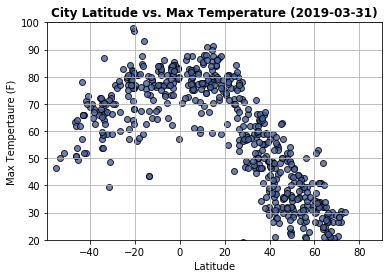

In [12]:
#Set the title,xlabel and ylabel using plt function  
date = city_data_df["Date"]
plt.title(f"City Latitude vs. Max Temperature ({today})",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Max Tempertaure (F)")
# Build the scatter plots for each city types
#source for color coding: https://www.computerhope.com/htmcolor.htm
plt.scatter(city_data_df.Lat,city_data_df['Max Temp'], marker="o",facecolors="#4863A0",
            edgecolors="black", alpha = 0.80)

# Incorporate the other graph properties
plt.grid()
plt.xlim(-59,90)
plt.ylim(20,100)
# # Save Figure
plt.savefig("lat_vs_max_temperature_scatter.png")
plt.show()

#### Latitude vs. Humidity Plot

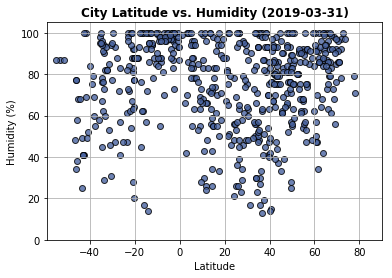

In [8]:
#Set the title,xlabel and ylabel using plt function  
plt.title(f"City Latitude vs. Humidity ({today})",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Build the scatter plots for each city types
#source for color coding: https://www.computerhope.com/htmcolor.htm
plt.scatter(city_data_df.Lat,city_data_df['Humidity'], marker="o",facecolors="#4863A0",
            edgecolors="black", alpha = 0.80)

# Incorporate the other graph properties
plt.grid()
plt.xlim(-59,90)
plt.ylim(0,105)
# # Save Figure
plt.savefig("lat_vs_humidity_scatter.png")
plt.show()

#### Latitude vs. Cloudiness Plot

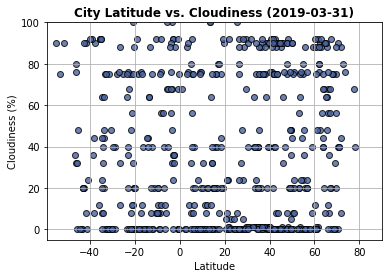

In [9]:
#Set the title,xlabel and ylabel using plt function  
plt.title(f"City Latitude vs. Cloudiness ({today})",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Build the scatter plots for each city types
#source for color coding: https://www.computerhope.com/htmcolor.htm
plt.scatter(city_data_df.Lat,city_data_df['Cloudiness'], marker="o",facecolors="#4863A0",
            edgecolors="black", alpha = 0.80)

# Incorporate the other graph properties
plt.grid()
plt.xlim(-59,90)
plt.ylim(-5,100)
# # Save Figure
plt.savefig("lat_vs_cloudiness_scatter.png")
plt.show()

#### Latitude vs. Wind Speed Plot

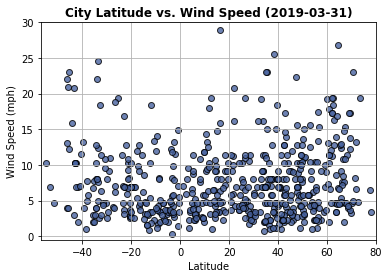

In [10]:
#Set the title,xlabel and ylabel using plt function  
plt.title(f"City Latitude vs. Wind Speed ({today})",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Build the scatter plots for each city types
#source for color coding: https://www.computerhope.com/htmcolor.htm
plt.scatter(city_data_df.Lat,city_data_df['Wind Speed'], marker="o",facecolors="#4863A0",
            edgecolors="black", alpha = 0.80)

# Incorporate the other graph properties
plt.grid()
plt.xlim(-57,80)
plt.ylim(-0.5,30)
# # Save Figure
plt.savefig("lat_vs_windspeed_scatter.png")
plt.show()